# Churn Prediction

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv(r"F:\projects\banking\churn_prediction 01\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.shape

(10000, 14)

In [6]:
# no missing values

In [7]:
df.select_dtypes(include="object")

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [8]:
df.select_dtypes(include=["int64","float64"])

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data cleaning

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# we will be removing rownumber,surname as it seems that we have no use of them in future

In [12]:
df.drop(columns=["RowNumber","Surname"],inplace=True)

In [13]:
df.select_dtypes(include="object")

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [14]:
df.select_dtypes(include=["int64","float64"])

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1


In [15]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

F:\anacponda main\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


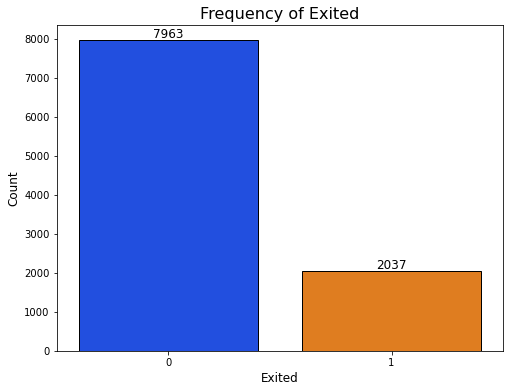

Total Values: 10000


In [17]:
#Plotting a Countplot to Explore the Label column
plt.figure(figsize=(8, 6))
sns.countplot(df['Exited'], palette='bright', edgecolor='black') 

# Adding a title and labels to the plot
plt.title('Frequency of Exited', fontsize=16)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding annotations to the bars
for i in range(len(df['Exited'].value_counts())):
    count = df['Exited'].value_counts()[i]
    label = count
    plt.annotate(label, (i, count), ha='center', va='bottom', fontsize=12)
    

plt.show()

#Getting the total values
print(f'Total Values:',  df.Exited.count()) 

In [18]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

F:\anacponda main\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


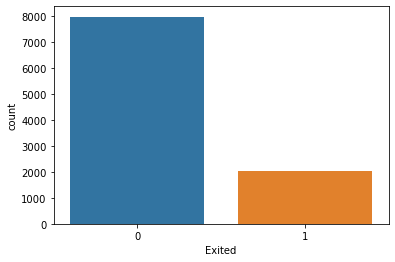

In [19]:
sns.countplot(df['Exited'])
plt.show()


# Corelation

In [20]:
df2=df.drop(columns=['Exited'])  #droping the unnecessary columns
df2

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


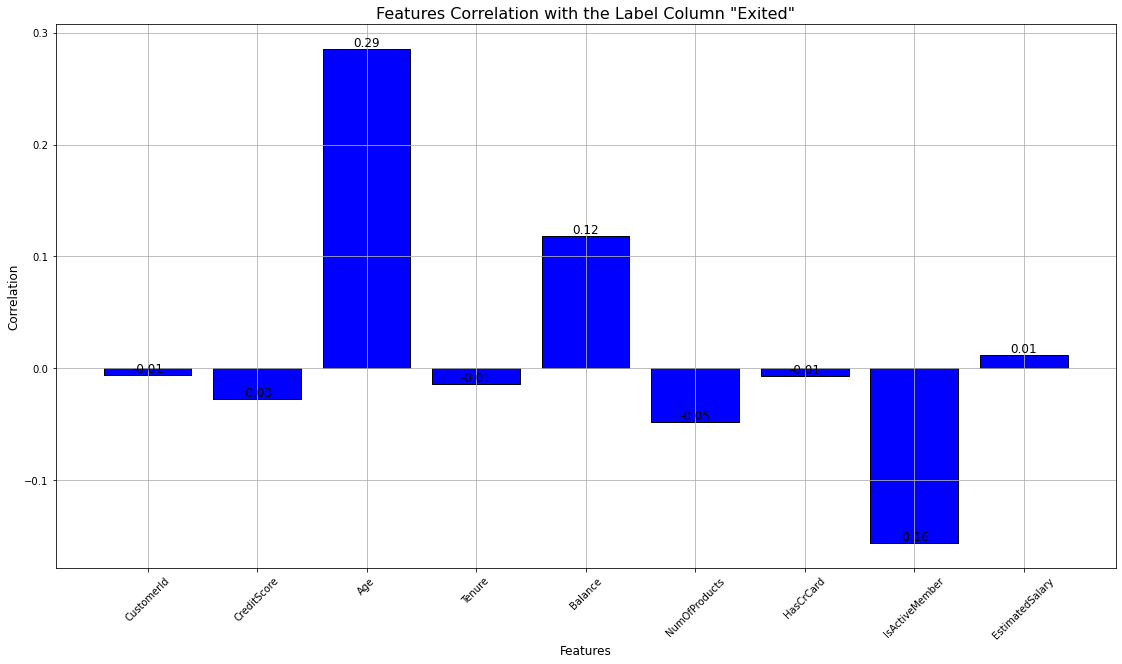

In [21]:
corrw = df2.corrwith(df['Exited'])
plt.figure(figsize=(19, 10))
plt.bar(corrw.index, corrw.values, color='blue', edgecolor='black')
plt.title('Features Correlation with the Label Column "Exited"', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
for i, value in enumerate(corrw.values):
    label = f"{value:.2f}"
    plt.annotate(label, (i, value), ha='center', va='bottom', fontsize=12)

# Displaying the plot
plt.show()


<AxesSubplot:>

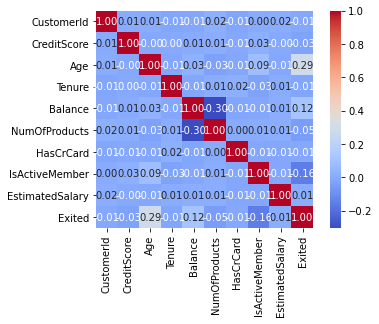

In [22]:
corr=df.corr()
sns.heatmap(corr,square=True,annot=True,cmap='coolwarm',fmt='.2f',cbar=True)

# Splitting the data into train,test

In [23]:
x=df.drop(columns=['Exited','Geography','Gender'])
y=df["Exited"]

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 9), (2000, 9), (8000,), (2000,))

In [26]:
#standarizing the data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [27]:
#model building

lr=LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

#testing the accuracy score with different parameters

from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score

acc=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred)
recal=recall_score(y_test,pred)
prec=precision_score(y_test,pred)
cnf_mat=confusion_matrix(y_test,pred)

result=pd.DataFrame([{'model':"Logistic Regression",'accuracy_score':acc,"f1_score":f1,"recall_score":recal,"precissiojn_score":prec}])

In [28]:
result

,model,accuracy_score,f1_score,recall_score,precissiojn_score
0,Logistic Regression,0.8075,0.263862,0.167476,0.621622


In [29]:
cnf_mat

array([[1546,   42],
       [ 343,   69]], dtype=int64)

In [37]:
#cross validation

accuricies=cross_val_score(estimator=lr,X=x_train,y=y_train,cv=10)
print('accuricies is: ',format(accuricies.mean()*100))
print(f"standard deviation is:",format(accuricies.std()*100))

accuricies is:  80.72500000000001
standard deviation is: 0.8584142356694688


In [49]:
# building the XGB model
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred)         # Getting the f1 Score 
rec  = recall_score(y_test, pred)     # Getting the recall Score 
prec = precision_score(y_test, pred)  # Getting the Precision Score 
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix 

#Defining a DataFrame 
rf_result=pd.DataFrame([{'model':"XGB boost",'accuracy_score':acc,"f1_score":f1,"recall_score":recal,"precissiojn_score":prec}])
result1 = result.append(rf_result, ignore_index=True)


In [50]:
result1

,model,accuracy_score,f1_score,recall_score,precissiojn_score
0,Logistic Regression,0.8075,0.263862,0.167476,0.621622
1,XGB boost,0.8455,0.531108,0.167476,0.708502


In [51]:
#cross validation

accuricies=cross_val_score(estimator=xgb,X=x_train,y=y_train,cv=10)
print('accuricies is: ',format(accuricies.mean()*100))
print(f"standard deviation is:",format(accuricies.std()*100))

accuricies is:  84.7875
standard deviation is: 0.901474486605138
